# NBAOLSS: Project

Chantal Rikse & Nigel Overmars & Machiel Kruger

In [1]:
import numpy

from fvm import Continuation
from fvm import Interface
from fvm import utils
from fvm import plot_utils

from jadapy import jdqz

from fvm.JadaInterface import JadaInterface, JadaOp

import matplotlib.pyplot as plt

## a)

In [2]:
dim = 2
dof = 3
nx = 64
ny = nx
nz = 1
n = dof * nx * ny * nz

# Define a point of interest, not clear what this does.
poi = (nx // 2, ny // 2)


# Define the problem



parameters = {'Problem Type': 'Lid-driven cavity',
              # Reynolds number set at 1, determines the vicousity of the model. 
              'Reynolds Number': 1,
              # We start at Lid velocity 0, as this result in a easy solution,
              # namely just the constant zero sol, no speed and no pressure diff
              'Lid Velocity': 0,
              # Value describes the value that is traced in the continuation
              # and time integration methods
              'Value': lambda x: utils.create_state_mtx(x, nx, ny, nz, dof)[poi[0], poi[1], 0, 0]}

# initiate the tools given to us.

# the size of the box is set to (1,1,1) if no other values are given. 
interface = Interface(parameters, nx, ny, nz, dim, dof)

print('Looking at point ({}, {})'.format(interface.discretization.x[poi[0]],
                                         interface.discretization.y[poi[1]]))
continuation = Continuation(interface, parameters)

# Compute an initial guess
x0 = numpy.zeros(dof * nx * ny * nz)
steady_sol = continuation.continuation(x0, 'Lid Velocity', 0, 1, 0.1)[0]








Looking at point (0.515625, 0.515625)
Newton corrector converged in 0 iterations with ||F||=5.603022e-06
Lid Velocity: 0.025433
Newton corrector converged in 0 iterations with ||F||=5.042720e-05
Lid Velocity: 0.076298
Newton corrector converged in 1 iterations with ||F||=1.322450e-10
Lid Velocity: 0.178031
Newton corrector converged in 1 iterations with ||F||=3.349971e-10
Lid Velocity: 0.381502
Newton corrector converged in 1 iterations with ||F||=8.119144e-09
Lid Velocity: 0.788461
Newton corrector converged in 1 iterations with ||F||=1.298633e-07
Lid Velocity: 1.602410
Newton corrector converged in 1 iterations with ||F||=2.138273e-09
Lid Velocity: 1.000020
Newton corrector converged in 0 iterations with ||F||=1.048031e-07
Lid Velocity: 1.000000
Convergence achieved onto target Lid Velocity = 1.000000


## b)

In [3]:


# note that the continuation has already updated its internal Velocity 
# this does not need any parameter updates in the contituation object instance. 
ds = 100
target = 5000
steady_sol_5k, mu, data1 = continuation.continuation(steady_sol, 'Reynolds Number', 1, target, ds)

print()

# note that the starting value set in the continuation, actually overrides 
# the one set in the parameters of the interface/continuator

# continue the solution even further
ds = 100
target = 10000
steady_sol_10k, mu, data1 = continuation.continuation(steady_sol_5k, 'Reynolds Number', 5000, target, ds)

Newton corrector converged in 4 iterations with ||F||=3.467375e-05
Reynolds Number: 100.977504
Newton corrector converged in 2 iterations with ||F||=6.944243e-06
Reynolds Number: 175.980569
Newton corrector converged in 2 iterations with ||F||=1.632382e-05
Reynolds Number: 288.485143
Newton corrector converged in 2 iterations with ||F||=1.983675e-05
Reynolds Number: 457.242008
Newton corrector converged in 2 iterations with ||F||=3.791210e-05
Reynolds Number: 710.377308
Newton corrector converged in 2 iterations with ||F||=3.036580e-05
Reynolds Number: 1090.080258
Newton corrector converged in 1 iterations with ||F||=9.902455e-05
Reynolds Number: 1659.634683
Newton corrector converged in 3 iterations with ||F||=1.285885e-06
Reynolds Number: 2798.743535
Newton corrector converged in 1 iterations with ||F||=6.606220e-05
Reynolds Number: 3937.852386
Newton corrector converged in 2 iterations with ||F||=1.910483e-05
Reynolds Number: 5937.933771
Newton corrector converged in 0 iterations wi

KeyboardInterrupt: 

## Steady state plot Reynolds number at 1

In [ ]:
velocity_steady = plot_utils.create_state_mtx(steady_sol, nx, ny, nz, dof)
plot_utils.plot_velocity_magnitude(velocity_steady[:, :, 0, 0], velocity_steady[:, :, 0, 1], interface)

In [ ]:
# Plot the pressure
plot_utils.plot_value(velocity_steady[:, :, 0, 2], interface)

## Steady state plot Reynolds number at 5000

In [ ]:
velocity_5k = plot_utils.create_state_mtx(steady_sol_5k, nx, ny, nz, dof)
plot_utils.plot_velocity_magnitude(velocity_5k[:, :, 0, 0], velocity_5k[:, :, 0, 1], interface)

In [ ]:
# Plot the pressure
plot_utils.plot_value(velocity_5k[:, :, 0, 2], interface)

## Steady state plot Reynolds number at 10000

In [ ]:
velocity_10k = plot_utils.create_state_mtx(steady_sol_10k, nx, ny, nz, dof)
plot_utils.plot_velocity_magnitude(velocity_10k[:, :, 0, 0], velocity_10k[:, :, 0, 1], interface)

In [ ]:
# Plot the pressure
plot_utils.plot_value(velocity_10k[:, :, 0, 2], interface)

## c)

In [ ]:
sizes = [64, 128, 256]#, 512]
dim = 2
dof = 3
nz = 1

for nx in sizes:
    print("Currently looking at nx=ny={}".format(nx))
    ny = nx
    n = dof * nx * ny * nz
    poi = (nx // 2 - 1, ny // 4 - 1)

    # luckily the FVM lib supports grid strechting.
    parameters = {'Problem Type': 'Lid-driven cavity',
              'Reynolds Number': 1,
              'Lid Velocity': 0,
              'Grid Stretching Factor': 1.5,
              'Verbose': True,
              'Value': lambda x: utils.create_state_mtx(x, nx, ny, nz, dof)[poi[0], poi[1], 0, 0]}

    interface = Interface(parameters, nx, ny, nz, dim, dof)

    continuation = Continuation(interface, parameters)

    # The initial zero sol. 
    x0 = numpy.zeros(dof * nx * ny * nz)
    # Continue this exact sol to the correct Lid velocity.
    steady_sol = continuation.continuation(x0, 'Lid Velocity', 0, 1, 0.1)[0]
    print("Finished calculating starting solution for nx=ny={}".format(nx))
    print()
    
    # Continue the found branch.
    ds = 100
    target = 5000
    steady_sol_5k, mu, data1 = continuation.continuation(steady_sol, 'Reynolds Number', 0, target, ds)
    print("Cont finished")
    print()
    print()
    print()
    


We observe that for bigger problem sizes, we are taking bigger steps in our Newton algorithm, i.e. $\|dx\|$ is bigger.

## d)

Determine the linear stability of the steady solutions over the intervalRe= 104using the JDQZalgorithm forN=M= 64.  Which bifurcation does occur on this branch and at what value ofRe, sayRec?  Plot the eigenvector(s) at this bifurcation, showing which perturbation patterns areamplified nearRe=Rec.  (Hint: Use an initial target of3i.)

(31, 31)
Newton corrector converged in 0 iterations with ||F||=1.547937e-05
Lid Velocity: 0.049251
Newton corrector converged in 1 iterations with ||F||=3.156039e-05
Lid Velocity: 0.147993
Newton corrector converged in 3 iterations with ||F||=9.620876e-06
Lid Velocity: 0.344488
Newton corrector converged in 1 iterations with ||F||=9.520092e-05
Lid Velocity: 0.541294
Newton corrector converged in 2 iterations with ||F||=2.033947e-05
Lid Velocity: 0.933980
Newton corrector converged in 2 iterations with ||F||=1.916745e-05
Lid Velocity: 1.522034
Newton corrector converged in 1 iterations with ||F||=2.691476e-07
Lid Velocity: 1.000115
Newton corrector converged in 0 iterations with ||F||=5.382994e-07
Lid Velocity: 1.000000
Convergence achieved onto target Lid Velocity = 1.000000
Finished calculating starting solution for nx=ny=64

Newton corrector converged in 0 iterations with ||F||=5.414362e-06
Reynolds Number: 1040.000000
Newton corrector converged in 0 iterations with ||F||=4.496769e-0

Found an eigenvalue: (-0.045744165854533614+3.116295587483185j)
Step:    5, subspace dimension:   8, eigenvalue estimate: -2.601330e-01 +  3.109655e+00i, residual norm: 3.366657e-06
Step:    6, subspace dimension:   9, eigenvalue estimate: -2.573468e-01 +  3.106261e+00i, residual norm: 7.699213e-07
Step:    7, subspace dimension:  10, eigenvalue estimate: -2.562426e-01 +  3.106578e+00i, residual norm: 2.442802e-07
Step:    8, subspace dimension:  11, eigenvalue estimate: -2.573794e-01 +  3.106591e+00i, residual norm: 1.442851e-07
Step:    9, subspace dimension:  12, eigenvalue estimate: -2.585326e-01 +  3.107249e+00i, residual norm: 1.005239e-07
Step:   10, subspace dimension:  13, eigenvalue estimate: -2.586527e-01 +  3.107801e+00i, residual norm: 3.285630e-08
Step:   11, subspace dimension:  14, eigenvalue estimate: -2.586208e-01 +  3.107788e+00i, residual norm: 1.016347e-08
Step:   12, subspace dimension:  15, eigenvalue estimate: -2.586103e-01 +  3.107768e+00i, residual norm: 4.540

Step:   26, subspace dimension:  28, eigenvalue estimate: -1.773848e-01 +  3.236088e+00i, residual norm: 9.459838e-11
Step:   27, subspace dimension:  29, eigenvalue estimate: -1.773848e-01 +  3.236088e+00i, residual norm: 2.072858e-11
Step:   28, subspace dimension:  30, eigenvalue estimate: -1.773848e-01 +  3.236088e+00i, residual norm: 4.247317e-12
Step:   29, subspace dimension:  31, eigenvalue estimate: -1.773848e-01 +  3.236088e+00i, residual norm: 2.821083e-13
Found an eigenvalue: (-0.17738481015169866+3.236088274900542j)
Step:   29, subspace dimension:  30, eigenvalue estimate: -2.469361e-02 +  2.700434e+00i, residual norm: 4.055951e-06
Step:   30, subspace dimension:  31, eigenvalue estimate: -4.508446e-02 +  2.675813e+00i, residual norm: 7.182009e-08
Step:   31, subspace dimension:  32, eigenvalue estimate: -4.516286e-02 +  2.675805e+00i, residual norm: 1.844274e-09
Step:   32, subspace dimension:  33, eigenvalue estimate: -4.517472e-02 +  2.675816e+00i, residual norm: 3.5959

Step:    3, subspace dimension:   7, eigenvalue estimate:  3.864883e-02 +  3.083468e+00i, residual norm: 1.579124e-10
Step:    4, subspace dimension:   8, eigenvalue estimate:  3.864880e-02 +  3.083469e+00i, residual norm: 2.242304e-12
Step:    5, subspace dimension:   9, eigenvalue estimate:  3.864877e-02 +  3.083469e+00i, residual norm: 3.946987e-14
Found an eigenvalue: (0.038648771349219097+3.0834693010631713j)
Step:    5, subspace dimension:   8, eigenvalue estimate: -2.237412e-01 +  3.083116e+00i, residual norm: 3.530728e-06
Step:    6, subspace dimension:   9, eigenvalue estimate: -2.275737e-01 +  3.076145e+00i, residual norm: 9.862103e-07
Step:    7, subspace dimension:  10, eigenvalue estimate: -2.259708e-01 +  3.074737e+00i, residual norm: 3.900872e-07
Step:    8, subspace dimension:  11, eigenvalue estimate: -2.254731e-01 +  3.074917e+00i, residual norm: 1.828719e-07
Step:    9, subspace dimension:  12, eigenvalue estimate: -2.252114e-01 +  3.074984e+00i, residual norm: 1.102

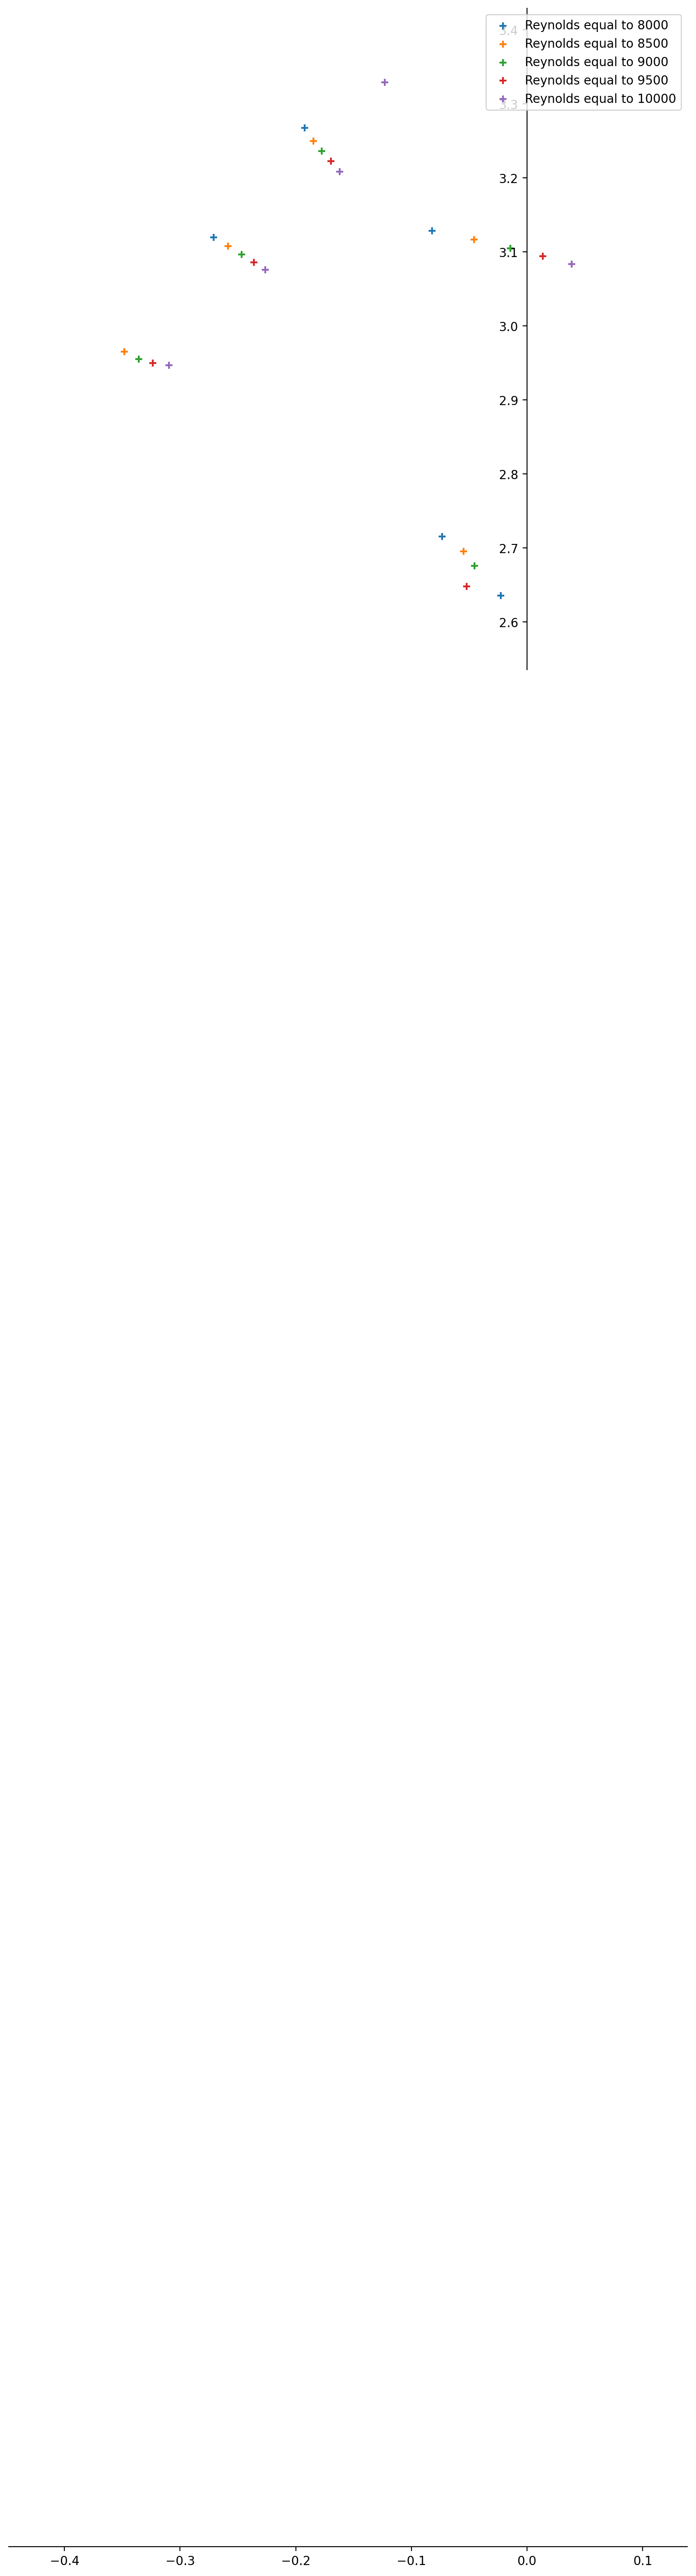

In [12]:
import numpy

from fvm import Continuation
from fvm import Interface
from fvm import utils
from fvm import plot_utils

from jadapy import jdqz

from fvm.JadaInterface import JadaInterface, JadaOp

import matplotlib.pyplot as plt

# Obtain the 4k steady state solution. 
dim = 2
dof = 3
nx = 64
ny = nx
nz = 1
n = dof * nx * ny * nz

# Define a point of interest
poi = (nx // 2 -1 , ny // 2 -1 )
print(poi)



# config
# set the Reynold numbers for which the linear stability analysis is preformed.
# set how many eigenvalue we want to calculate per case. 
starting_re = 1000
eigs_per_calc = 10




#targets = [1500,2000,2500,3000]
#targets = [3000,3500,4000,4500,5000]
#targets = [7000,7500,8000,8500,9000]

# At the moment, using a nx&ny higher than 50 result in a no-error no-info crash. 
# This is unbelievabily annoying, and no easy config change seems to fix this. 

# Stripping away the Jada interface does no good, besides making convergence take 
# even longer or destroying it completely

# It seems to be realated to how ill-conditioned the problem becomes. 
# As the 'norm during normalization' approaches zero

# Also fun is the amount of GMRES failures that occur occassionally. 

# The grid stretching factor needs to be checked in the github source
# This may help the afwully ill-conditioned results from the continuation in something that actually calculates. 


# At lower resolutions the Bifurcations happens at different values, but I am beginning to doubt 
# the validity of the eigenvalue algorithm. Or the 

#Find bifurecation at Re = ~8750 around e = 2.5j, ONLY when nx=50.  
targets = [8000,8500,9000,9500,10000]

#Find bifurecation at Re = ~6100 around e = 2.5j, ONLY when nx=32. MINIMAL nx that gives plausible results. 
#targets = [5000,5500,5750,6000,6250,6500,7000,7500,8000]

#Find no bifurecation at all ONLY when nx=16. The resolution is just too small, even for a normalish solution. 
#targets = [4000,5000,6000,7000,8000,9000,10000,11000,12000,13000]



# Define the problem
parameters = {'Problem Type': 'Lid-driven cavity',
              # Problem parametes
              'Reynolds Number': starting_re,
              'Lid Velocity': 0,
              'Grid Stretching Factor': 1.5,
              'Verbose': False,
              # Value describes the value that is traced in the continuation
              # and time integration methods
              'Value': lambda x: utils.create_state_mtx(x, nx, ny, nz, dof)[poi[0], poi[1], 0, 0]}

interface = Interface(parameters, nx, ny, nz, dim, dof)

continuation = Continuation(interface, parameters)

# Compute an initial guess
x0 = numpy.zeros(dof * nx * ny * nz)
steady_sol = continuation.continuation(x0, 'Lid Velocity', 0, 1, 0.05)[0]
print("Finished calculating starting solution for nx=ny={}".format(nx))
print()


ds = 40


eigs = numpy.zeros([len(targets), eigs_per_calc // 2], dtype=numpy.complex128)
    
sol = steady_sol

Re = starting_re
previous_subspaces = None
i = 0
for target in targets:
    
    # dont really need the data output here. So that is scratched. 
    # contine to each Re point. 
    sol, Re, _ = continuation.continuation(sol, 'Reynolds Number', Re, target, ds)
    
    
    # this eigenvalue calculation is the same as the JVM lib uses in its examples. 
    # slightly modified for input, but largely the same. 
    print("start eigenvalue calc...")
    jac_op = JadaOp(interface.jacobian(sol))
    mass_op = JadaOp(interface.mass_matrix())
    jada_interface = JadaInterface(interface, jac_op, mass_op, n, numpy.complex128)
    
    
    #print(interface.mass_matrix())
    alpha, beta, eig_vecs, q, z = jdqz.jdqz(jac_op, mass_op, tol=1e-12, subspace_dimensions=[30, 60], target=3j,
                                            interface=None, arithmetic='complex', prec=jada_interface.shifted_prec,
                                            return_subspaces=True, initial_subspaces=previous_subspaces,
                                            return_eigenvectors=True)

    # Store the generalized eigenvalues, J(x)*v = (a/b) M v, where M is the mass matrix. 
    eigs[i, :] = alpha / beta

    # Use the subspaces in JDQZ computed for this Reynolds number as initial guesses for JDQZ at the next Reynolds number
    previous_subspaces = (q, z)
    
    i = i+1

    
    
    
    
# Plot the eigenvalues
f = plt.figure(figsize=(10,10), dpi= 200, facecolor='w', edgecolor='k')
ax = f.subplots()

for i in range(eigs.shape[0]):
        ax.scatter(eigs[i, :].real, eigs[i, :].imag, marker='+',label='Reynolds equal to ' +str(targets[i]) )
        
        
ax.set_ylim(abs(eigs.imag).min() - 0.1, abs(eigs.imag).max() + 0.1)
ax.set_xlim(eigs.real.min() - 0.1, eigs.real.max() + 0.1)


# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')


plt.legend()
plt.show()



The graph show that the eigenvalues found for target 3i dim their real value below 0.

## (e

In [7]:
sizes = [64, 128, 256]#, 512]
dim = 2
dof = 3
nz = 1

for nx in sizes:
    print("Currently looking at nx=ny={}".format(nx))
    ny = nx
    n = dof * nx * ny * nz
    poi = (nx // 2 - 1, ny // 4 - 1)

    # luckily the FVM lib supports grid strechting.
    parameters = {'Problem Type': 'Lid-driven cavity',
              'Reynolds Number': 1,
              'Lid Velocity': 0,
              'Grid Stretching Factor': 1.5,
              'Verbose': True,
              'Value': lambda x: utils.create_state_mtx(x, nx, ny, nz, dof)[poi[0], poi[1], 0, 0]}

    interface = Interface(parameters, nx, ny, nz, dim, dof)

    continuation = Continuation(interface, parameters)

    # The initial zero sol. 
    x0 = numpy.zeros(dof * nx * ny * nz)
    # Continue this exact sol to the correct Lid velocity.
    steady_sol = continuation.continuation(x0, 'Lid Velocity', 0, 1, 0.1)[0]
    print("Finished calculating starting solution for nx=ny={}".format(nx))
    print()
    
    # Continue the found branch.
    ds = 100
    target = 5000
    steady_sol_5k, mu, data1 = continuation.continuation(steady_sol, 'Reynolds Number', 0, target, ds)
    print("Cont finished")
    print()
    print()
    print()
    

Currently looking at nx=ny=64
Newton corrector converged in 0 iterations with ||F||=4.656277e-07
Lid Velocity: 0.008542
Newton corrector converged in 0 iterations with ||F||=4.190650e-06
Lid Velocity: 0.025626
Newton corrector converged in 0 iterations with ||F||=2.281576e-05
Lid Velocity: 0.059794
Newton corrector status at iteration 0: ||F||=1.047662e-04, ||dx||=6.684396e-02
Newton corrector converged in 1 iterations with ||F||=3.704063e-11
Lid Velocity: 0.128131
Newton corrector status at iteration 0: ||F||=1.331695e-04, ||dx||=8.496481e-02
Newton corrector converged in 1 iterations with ||F||=5.984699e-11
Lid Velocity: 0.264803
Newton corrector status at iteration 0: ||F||=7.152010e-04, ||dx||=4.563052e-01
Newton corrector converged in 1 iterations with ||F||=1.726143e-09
Lid Velocity: 0.538145
Newton corrector status at iteration 0: ||F||=2.860780e-03, ||dx||=1.825096e+00
Newton corrector converged in 1 iterations with ||F||=2.761465e-08
Lid Velocity: 1.084816
Newton corrector sta

Lid Velocity: 0.430501
Newton corrector status at iteration 0: ||F||=3.293338e-04, ||dx||=3.206973e+00
Newton corrector converged in 1 iterations with ||F||=1.351283e-09
Lid Velocity: 0.867829
Newton corrector status at iteration 0: ||F||=1.916972e-03, ||dx||=1.866595e+01
Newton corrector converged in 1 iterations with ||F||=4.577142e-08
Lid Velocity: 1.742448
Newton corrector status at iteration 0: ||F||=1.639356e-04, ||dx||=1.596524e+00
Newton corrector converged in 1 iterations with ||F||=3.348128e-10
Lid Velocity: 1.000008
Newton corrector converged in 0 iterations with ||F||=1.029371e-08
Lid Velocity: 1.000000
Convergence achieved onto target Lid Velocity = 1.000000
Finished calculating starting solution for nx=ny=256

Newton corrector status at iteration 0: ||F||=2.666030e+00, ||dx||=6.614165e+03
Newton corrector converged in 1 iterations with ||F||=6.489410e-05
Reynolds Number: 100.069553
Newton corrector status at iteration 0: ||F||=5.307788e+00, ||dx||=1.277102e+04
Newton corr

## f)

Now we are going to compute the transients for $\dfrac{Re - Re_c}{Re_c} = \pm 0.01$